## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?

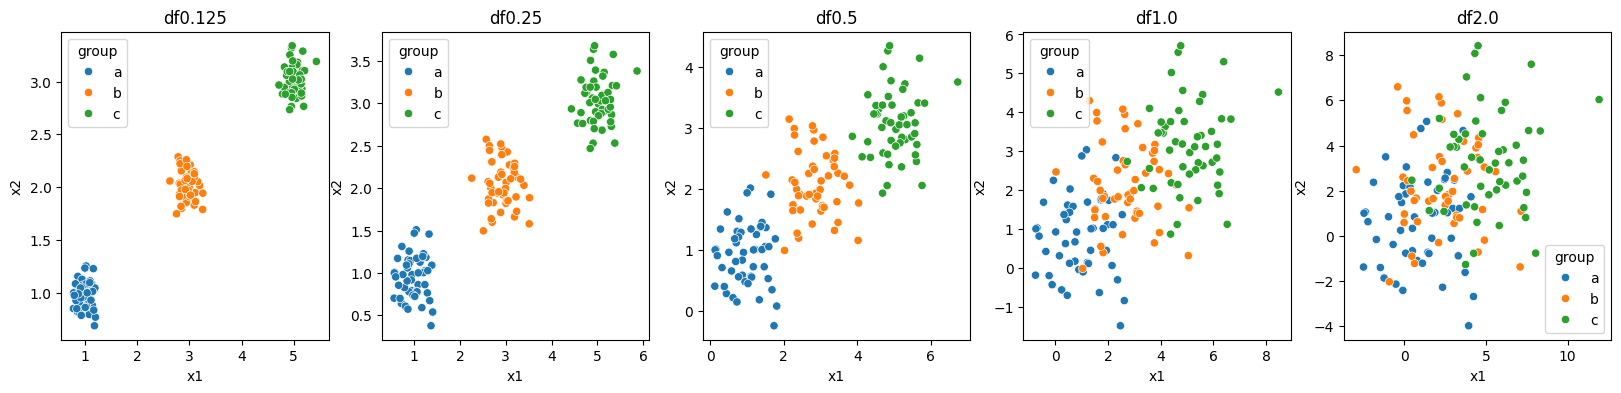

Scree plot for df0.125


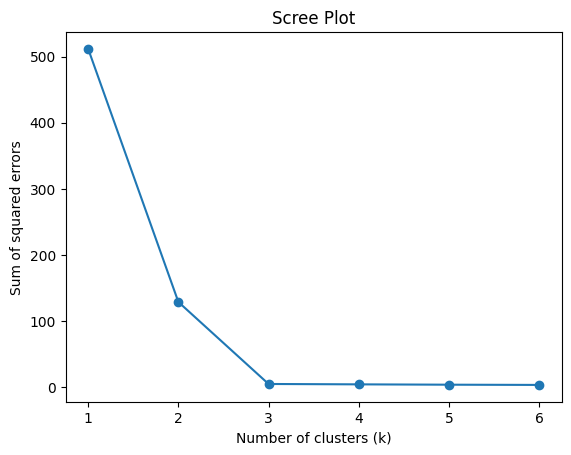

Scree plot for df0.25


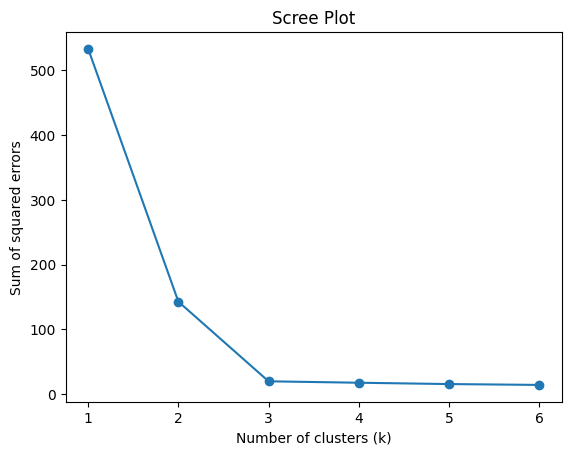

Scree plot for df0.5


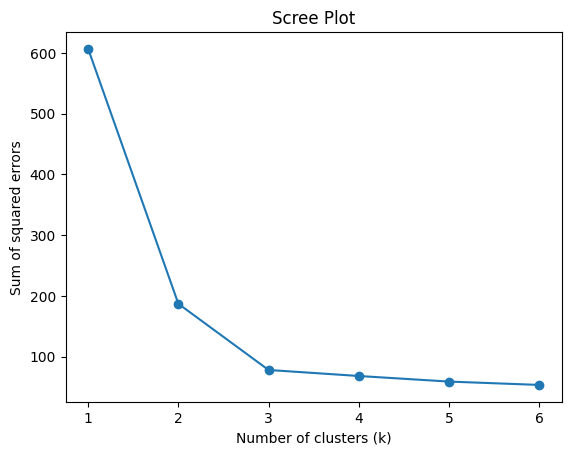

Scree plot for df1.0


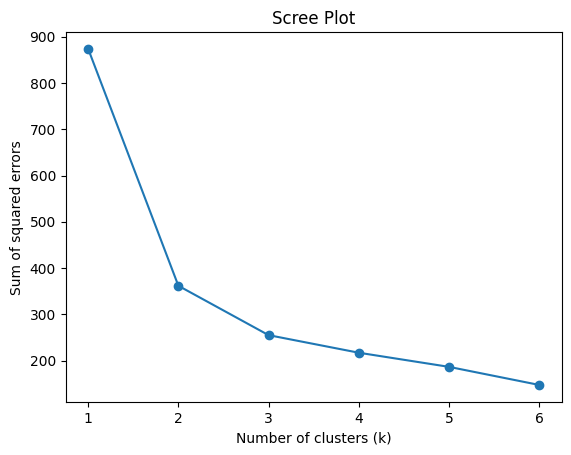

Scree plot for df2.0


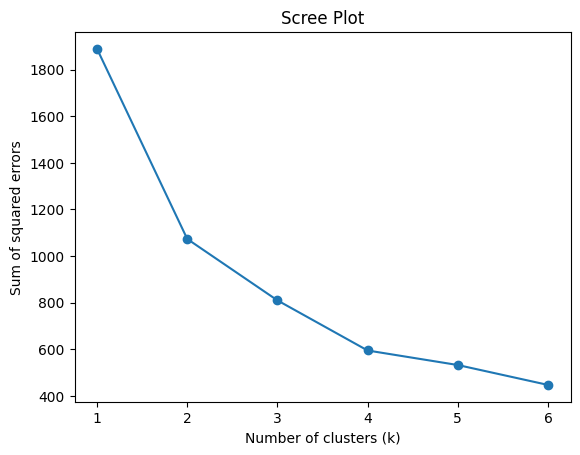

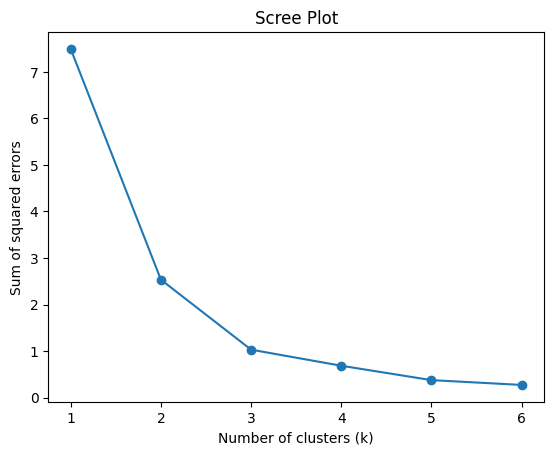

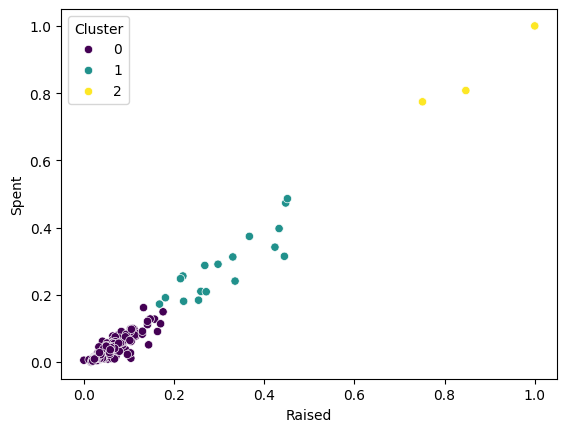

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

def createData(noise, N=50):
    np.random.seed(100)
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    df = pd.concat([gdf1, gdf2, gdf3], axis=0)
    return df

noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]
datasets = {f'df{n}': createData(n) for n in noise_levels}

# plot noisy data
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, (name, data) in zip(axes, datasets.items()):
    sns.scatterplot(data=data, x='x1', y='x2', hue='group', ax=ax)
    ax.set_title(name)
plt.show()

# scree plot for k-means
def plot_scree(data, max_k=6):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of squared errors')
    plt.title('Scree Plot')
    plt.show()

for name, data in datasets.items():
    print(f"Scree plot for {name}")
    plot_scree(data[['x1', 'x2']].values)

**Q1**

2. With lower noise we see the points more compact and kept to themselves. However, as the values increase they start to spread out more and combine with other cluster points.

3. The scree plot and its elbow point guides us in finding the optimal number of clusters. Through the scree plot we can pinpoint the exact point where the variance drops compared to the rest of the plot. As noise values grow it becomes more difficult to pinpoint the exact elbow point as the plot starts to become more linear.

4. The scree plot is most useful when the clusters are more compact and within their group. If there is too much noise, it becomes significantly difficult to find an elbow therefore making the method less useful.

**Q2**



<ipython-input-12-44317d778bec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-12-44317d778bec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-12-44317d778bec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

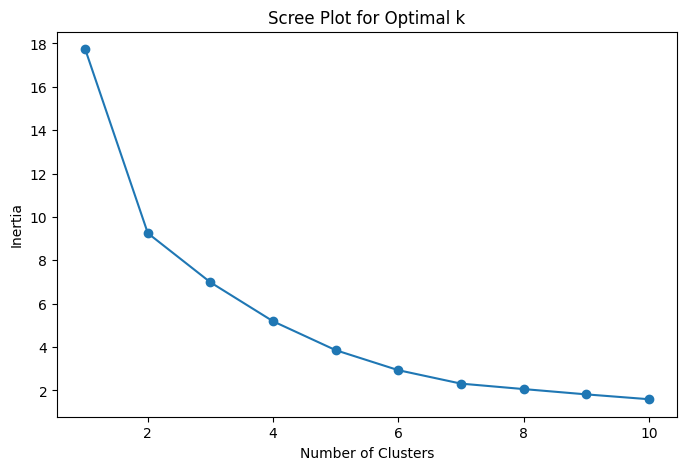

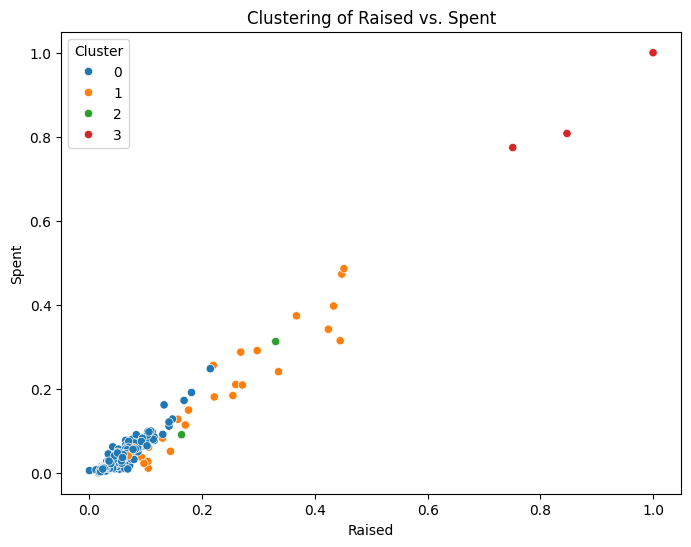

Politicians in the smallest two clusters:
         Raised       Spent  Cash on Hand       Debts
133  12990741.0   6878050.0     6206371.0  13302000.0
340  73140886.0  61357281.0    13186127.0         0.0
417  86581469.0  75959810.0    22762985.0         0.0
442  27680901.0  23731653.0     4508581.0  11759857.0
523  64682883.0  58806664.0     6647641.0         0.0


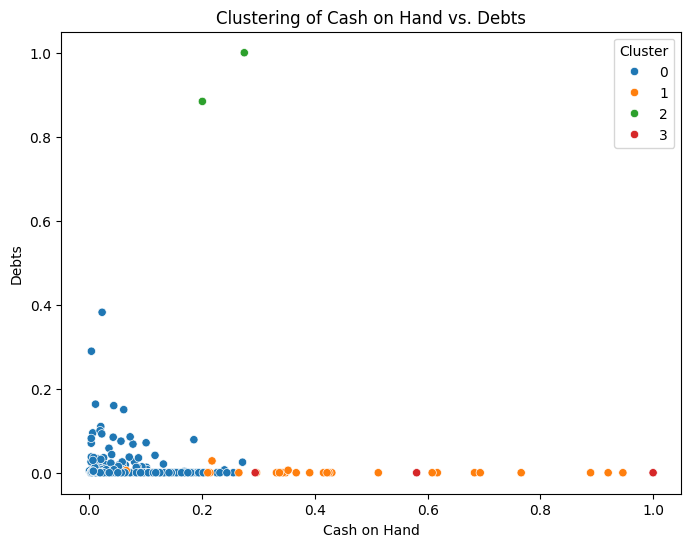

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

election_file = "/content/sample_data/2022-election-cycle-fundraising.csv"
df_election = pd.read_csv(election_file)
df_election.head()

columns = ["Raised", "Spent", "Cash on Hand", "Debts"]
df = df_election[columns]

# convert dollar-formatted strings to numeric
for col in columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# handling missing values
df = df.fillna(df.median())

# normalize
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# scree Plot
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Scree Plot for Optimal k")
plt.show()

k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# clustering for raised and spent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x="Raised", y="Spent", hue=df_scaled["Cluster"], palette="tab10")
plt.xlabel("Raised")
plt.ylabel("Spent")
plt.title("Clustering of Raised vs. Spent")
plt.legend(title="Cluster")
plt.show()


cluster_counts = df_scaled["Cluster"].value_counts()
smallest_clusters = cluster_counts.nsmallest(2).index.tolist()
smallest_politicians = df[df_scaled["Cluster"].isin(smallest_clusters)]

print("Politicians in the smallest two clusters:")
print(smallest_politicians)

# clustering for cash on hand and debts
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x="Cash on Hand", y="Debts", hue=df_scaled["Cluster"], palette="tab10")
plt.xlabel("Cash on Hand")
plt.ylabel("Debts")
plt.title("Clustering of Cash on Hand vs. Debts")
plt.legend(title="Cluster")
plt.show()

kmeans_full = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_scaled["Full_Cluster"] = kmeans_full.fit_predict(df_scaled)



In [11]:
kmeans_full = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_scaled["Full_Cluster"] = kmeans_full.fit_predict(df_scaled)

# compare clusters
print("Clusters for all four variables:")
print(df_scaled["Full_Cluster"].value_counts())

Clusters for all four variables:
Full_Cluster
0    502
2     30
1      3
3      2
Name: count, dtype: int64


**Q2.**

When comparing the two scatter plots of spent vs. raised and debts vs. cash on hand: We notice that most candidates fall very close to one another. The form a shadow of a linear pattern meaning spending and fundraising were proportional for most candidates. There are a few outliers, however, it was interesting to see these candidates were not the same outlier represented on the debts vs. cash on hand graph. The second scatterplot of debts vs. cash on hand displayed most candidates to be financially stable. There were many who fell under the proportional crowd and everyone else had lots of cash on hand but no debt. There were some obvious canddiates who had debt despite raising significant amount of money, highlighting their potential significant spending.

Overall, using k-means was helpful as it displayed specific relationships between the four variables. We were able to measure spending, raised, and debts in comparision to each other revealing similar responsibilities on each candidate during their campaigns.